<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 3*

---

# High dimensional data

## 🏆 학습 목표 

- Vector transformation의 목적과 사용예시를 설명 할 수 있다.
- eigenvector / eigenvalue를 설명 할 수 있다.
- 데이터의 feature 수가 늘어나면 생기는 문제점과 이를 handling 하기 위한 방법을 설명 할 수 있다.
- PCA의 목적과 기본원리를 설명 할 수 있다.

---



# Vector transformation


오늘은, $\mathbb{R}^2$ 공간에서 벡터를 변환하는 것부터 시작하도록 하겠습니다.

여기서 말하는 변환, 즉 선형 변환은 임의의 두 벡터를 더하거나 혹은 스칼라 값을 곱하는 것을 의미합니다.

<br>

\begin{align}
T(u+v) = T(u)+T(v)
\\
T(cu) = cT(u)
\end{align}

<br>

<img src='https://user-images.githubusercontent.com/6457691/89977531-4a73b400-dca6-11ea-9f43-f0c1f124b70b.jpg' width = 600>

<br>

<img src='https://i.imgur.com/hHjvJpH.png' width = 600>

- 어제 배웠던 Linear projection도 일종의 vector transformation입니다.

## 벡터변환으로써의 매트릭스-벡터의 곱 

- `f` 라는 transformation을 사용하여 
- 임의의 벡터 `[x1, x2]`에 대해서, 
- `[2x1 + x2, x1 -3x2 ]`로 변환을 한다

라는 것은 아래와 같이 표현 될 수 있습니다.

\begin{align}
f(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} 2x_1 + x_2 \\ x_1 -3x_2 \\  \end{bmatrix}
\end{align}

여기서 원래 벡터 `[x1, x2]`는 유닛벡터를 이용하여 아래처럼 분리 할 수 있는데요, 

$x_1 \cdot \hat{i} + x_2 \cdot \hat{j}$ 

분리된 각 유닛벡터는 transformation를 통해서 각각 
- $2x_1$, $x_1$과
- $x_2$, $-3x_2$라는 결과가 나와야 한다는 것을 알 수 있습니다.

이를 매트릭스의 형태로 합치게 되면

\begin{align}
T = \begin{bmatrix} 2 & 1 \\ 1 & -3 \end{bmatrix}
\end{align}

위와 같은 $T$ 라는 매트릭스를 얻을 수 있고 

이 매트릭스를 처음 벡터 `[x1,x2]`에 곱했을 경우 transformation이 원하는 대로 이루어진다는 것을 알 수 있습니다.

---

즉, 임의의 $\mathbb{R}^2$ 벡터를 다른 $\mathbb{R}^2$ 내부의 벡터로 변환 하는 과정은, 

특정 $T$라는 매트릭스를 곱하는 것과 동일한 과정입니다.

새로운 벡터 (3,4)에 대하여 동일한 필터로 transform 하는 경우, 방금 구한 $T$라는 매트릭스에 곱하는 것으로 쉽게 할 수 있습니다.

\begin{align}
\begin{bmatrix} 2 & 1 \\ 1 & -3 \end{bmatrix}\begin{bmatrix} 3 \\ 4 \end{bmatrix} = \begin{bmatrix} 10 \\ -9 \end{bmatrix}
\end{align}

벡터 transformation은, 선형 즉 곱하고 더하는 것으로만 이뤄진 transformation이기 때문에 매트릭스와 벡터의 곱으로 표현 할 수 있습니다. 

[10 -9]


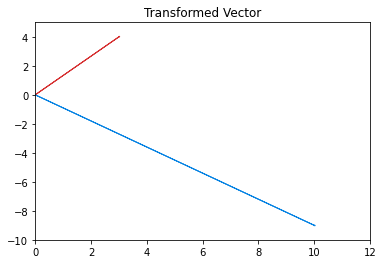

In [1]:
import matplotlib.pyplot as plt
import numpy as np

input_vector = np.array([3, 4])

transform_matrix = np.array([[2, 1], [1, -3]])

output_vector = np.matmul(transform_matrix, input_vector)# [10, -9] 

print(output_vector)

plt.arrow(0, 0, input_vector[0], input_vector[1], head_width = .05, head_length = .05, color ='#d63031')
plt.arrow(0, 0, output_vector[0], output_vector[1], head_width = .05, head_length = .05, color ='#0984e3')
plt.xlim(0, 12)
plt.ylim(-10, 5)
plt.title("Transformed Vector")
plt.show()

## 고유벡터 (Eigenvector)

Transformation은 matrix를 곱하는 것을 통해, 벡터(데이터)를 **다른 위치로 옮긴다**라는 의미를 가지고 있습니다. 

이번 예시에는 $\mathbb{R^3}$ 공간에서의 transformation을 사용해보도록 하겠습니다.

아래의 회전하는 지구본은 $\mathbb{R^3}$ 공간에서의 임의의 위치에서 다른 위치로 옮겨진다는 것을 설명하고 있습니다. 

<img src='https://user-images.githubusercontent.com/6457691/89986497-9d099c00-dcb7-11ea-81d1-3104ec05d818.png' width = 600>


$\mathbb{R^3}$ 공간이 회전 할때, 위치에 따라서 **변화 하는 정도**가 다르다는걸 눈치 채셨나요? 

- 가령 적도 부근에 있는 점의 변화되는 거리와, 극지방에 있는 점의 위치 변화의 크기는 다를 것입니다.
- 이는 회전축으로 가까이 갈 수록 / 멀어질 수록 더욱 명확해지며, 정확하게 회전축에 위치 해있는 경우, transformation을 통해 위치가 변하지 않습니다. 

이러한 transformation에 영향을 받지 않는 회전축, (혹은 벡터)을 공간의 **고유벡터 (Eigenvector)**라고 부릅니다.
 



## 고유값 (Eigenvalue)

앞서 봤던 고유벡터는 주어진 transformation에 대해서 크기만 변하고 방향은 변화 하지 않는 벡터입니다. 

여기서 변화하는 크기는 결국 스칼라 값으로 변화 할 수 밖에 없는데, 이 **특정 스칼라 값**을 **고유값** (eigenvalue)이라고 합니다. 

eigenvector와 eigenvalue는 항상 쌍을 이루고 있다는 점에 유념하시길 바랍니다.

$T \cdot v = v' = \lambda \cdot v $ 

\begin{align}
\begin{bmatrix} a & b \\ c & d \end{bmatrix}\begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} ax+by \\ cx+dy \end{bmatrix} = \lambda \begin{bmatrix} x \\ y \end{bmatrix}
\end{align}


### Example

\begin{align}
\begin{bmatrix} 4 & 2 \\ 2 & 4 \end{bmatrix}\begin{bmatrix} 3 \\ -3 \end{bmatrix} = \begin{bmatrix} 6 \\ -6 \end{bmatrix} = 2 \begin{bmatrix} 3 \\ -3 \end{bmatrix}
\end{align}


## 고유값의 표기 

$\lambda$ 로 표현합니다.

\begin{align}
T(v) = \lambda v
\end{align}



## 고유값, 고유벡터 계산하기 

이 내용은 Matrix Diagonalization 과 Gaussian Elimination등, 선형대수의 복잡한 내용들을 포함하고 있기 때문에 자세히 설명하지는 않겠습니다. 

대신 이를 응용하는 **Principle Component Analysis (PCA)** 에 관련된 기본 컨셉들을 더 공부해보도록 하겠습니다.


## 고유값을 왜 배우는걸까요?

Vector transformation은 결국 궁극적으로는 데이터를 변환한다 라는 큰 목적의 단계 중 하나입니다.

그러면 우리는, 이런 생각을 하게 될 겁니다.

> 과연 데이터를 왜? 어떻게? transformation 해야할까

예를 들어 

\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} 라는 데이터는 

\begin{bmatrix} 5 \\ 6 \end{bmatrix} 로 transformation 할 수도 있고.

\begin{bmatrix} 7 \\ 8 \end{bmatrix} 로 transformation 할 수도 있고.

목적에 따라서, 거의 무한한 방법으로 transformation을 할 수가 있을텐데. 

그 중 어떤 목적으로, 어떤 transformation을 하냐에 따라서 고유값이 하나의 선택지가 된다는 겁니다.

그렇다면 고유값은 어떤 목적으로 쓰일까요?



# 고차원의 문제 (The Curse of Dimensionality)

The Curse of Dimensionality란 피쳐의 수가 많은 (100 혹은 1000개 이상의) 데이터셋을 모델링하거나 분석할때에 생기는 여러 문제점들을 의미합니다.

## Dimension

임의의 50개 수로 이루어진 데이터셋을 가정해보겠습니다. 

In [2]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# 50개 데이터 생성 후 데이터 프레임에 저장
N = 50
x = np.random.rand(N)*100

data = {"x": x}
df = pd.DataFrame(data)
df.head()

,x
0,82.168821
1,56.636806
2,24.919689
3,41.507582
4,61.942861


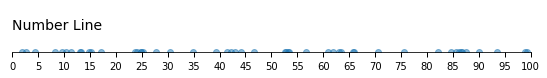

In [3]:
# 선에 데이터 표기

def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which = 'major', width = 1)
    ax.tick_params(which = 'major', length = 5)
    ax.tick_params(which = 'minor', width = .75)
    ax.tick_params(which = 'minor', length = 2.5)
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 1)
    ax.patch.set_alpha(0)
    
plt.figure(figsize=(8, 6))
n = 8

df['y'] = pd.Series(list(np.zeros(50)))

ax = plt.subplot(n, 1, 2)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.text(0, 0.5, "Number Line", fontsize = 14, transform = ax.transAxes)

plt.subplots_adjust(left = .05, right = .95, bottom = .05, top = 1.05)
plt.scatter(df.x, df.y, alpha = .5)
plt.show()

### 2D 데이터셋

이번에는 feature가 2개입니다. (여전히 50 sample 입니다)


In [4]:
# 임의의 50개 feature값을 생성
df['y'] = pd.Series(list(np.random.rand(N)*100))
df.head()

,x,y
0,82.168821,19.557786
1,56.636806,7.073227
2,24.919689,47.147265
3,41.507582,14.611711
4,61.942861,97.544182


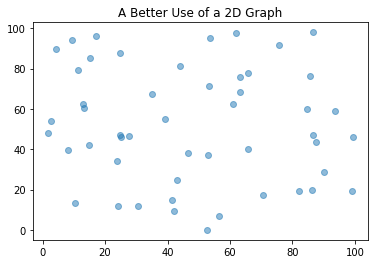

In [5]:
plt.scatter(df['x'], df['y'], alpha = .5)
plt.title("A Better Use of a 2D Graph")
plt.show()

### 3D의 데이터셋을 그려봅시다.

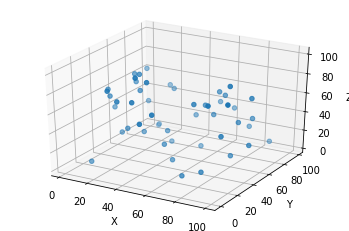

In [6]:
from mpl_toolkits.mplot3d import Axes3D

# z 값을 추가
df['z'] = pd.Series(list(np.random.rand(N)*100))

threedee = plt.figure().gca(projection = '3d')
threedee.scatter(df['x'], df['y'], df['z'])
threedee.set_xlabel('X')
threedee.set_ylabel('Y')
threedee.set_zlabel('Z')
plt.show()

### 만약 4D의 데이터셋은 어떻게 될까요?

물론 이론적으로는 아직 4D 그래프 까지는 가능합니다만 결과는 3D 그래프에 그리는 것에 비해서 전혀 의미가 없습니다.

<img src='https://mathworld.wolfram.com/images/eps-gif/HypercubeGraphUnitDistance_1000.gif' width = 600>


### 20D의 데이터셋 (Feature가 20개)

<img src='https://user-images.githubusercontent.com/6457691/89989454-f1167f80-dcbb-11ea-954d-2cffc7c3f62d.png' width = 400>

- 사실 사람의 뇌는 3차원 이상의 정보를 공간적으로 다루는 것이 **거의** 불가능 합니다. 

- 다시 말해 이는 여러 차원의 데이터셋을 다루는 데에 있어서 큰 이슈가 됩니다.


## 고차원 데이터를 분석하기 위한 더 복잡한 시각화

<img src="https://seaborn.pydata.org/_images/pairplot_1_0.png" width = 400>

위의 pairplot은 4차원 데이터셋에 포함 되어 있는 변수들의 가능한 조합에 대해서 scatter plot을 그리고, 동일한 변수 조합에 대해서는 histogram을 그리고 있습니다.

문제 : 만약 20차원의 데이터셋이라면 scatter plot은 몇개를 그려야 할까요? 

- 한가지 유념할 것은, pairplot에는 상당히 많은 양의 불필요한 scatterplot이 있습니다.


## 추가 Feature 사용과 결과물

데이터셋에서 인사이트를 찾기 위해 쓰이는 모든 feature가 동일하게 중요하지는 않습니다. 
Feature를 추가로 사용하는 것이 실제적으로 얼마나 의미있게 더 좋은 결과를 모델링 하게 되는지는 고민해야 할 문제라는 거죠.

다음은 인공지능 (딥러닝) 이미지 인식의 좋은 예시입니다

<img src='https://user-images.githubusercontent.com/6457691/89990525-7babae80-dcbd-11ea-8e02-bbe27aa8c6bd.jpg' width = 500>

<br>

<img src='https://image.fmkorea.com/files/attach/new/20190429/486616/667852209/1774330158/b26f88e6f915d658d5d858fe0d93a452.png' width = 500>

데이터의 일부를 제한하더라도, 의미 파악에는 큰 차이가 없다는걸 안다면, feature의 수와 관련하여 어느 시점에서는 feature를 더 사용하는 것이 비효율적일것 입니다.

- <https://en.wikipedia.org/wiki/Dilution_(neural_networks)>



## 높은 feature의 다른 문제점

샘플 수에 비해서 feature의 수가 너무 많은 경우, overfitting의 문제 또한 발생합니다. 

<img src='https://user-images.githubusercontent.com/6457691/89990876-f4126f80-dcbd-11ea-9046-8a4d7181d2ea.jpg'>

> 지금은 이 그림의 의미를 모르겠지만, 3주가 지난 후, 이해하게 될 겁니다.

물론 이에 대해서 정확하게 정해진 기준이 있는 건 아니지만, 

일반적으로 feature의 수를 $P$, sample의 수를 $N$이라 할 때 

**P** $\geq$ **N** 인 경우 매우 높은 overfitting 이슈가 생긴다고 할 수 있습니다. 



# Dimension Reduction

데이터의 시각화나 탐색이 어려워지는 것 뿐만 아니라 모델링에서의 overfitting 이슈를 포함하는 등 "빅데이터"인 데이터셋의 feature가 많으면 많을 수록 이로 인해 발생하는 문제는 점점 많아질 것입니다. 

만약 "빅데이터"를 적절한 처리를 통해 충분한 의미를 유지하면서 더 작은 부분만 선택 할 수 있다면 어떨까요? 

머신러닝에서는 이를 위한 다양한 차원축소 기술들이 이미 연구되어 있습니다. 사실 지금도 연구 중이죠.

## Feacture Selection: 

분석해야할 데이터셋에 100개의 feature가 있다고 해봅시다. 100종류의 feature를 전부 사용 하는 대신에, 데이터셋에서 제일 다양하게 **분포**되어있는 (1개의) feature를 사용하는 것입니다. 이처럼 Feature Selection이란 데이터셋에서 덜 중요한 feature를 제거 하는 방법을 의미합니다.

## Feature Extraction

`Feature Extraction`이란 앞서 `Feature engineering` 부분에서 접했던 것처럼, 
- 기존에 있는 Feature 혹은 
- 그들을 바탕으로 조합된 Feature를 사용 하는 것으로 

PCA도 Feature extraction의 한 예시로 볼 수 있습니다. 



### ❓ Selection 과 Extraction의 차이

<img src='https://i.imgur.com/yuFQkLa.png' width = 400>

Selection 의 경우 

- 장점 : 선택된 feature 해석이 쉽다.
- 단점 : feature들간의 연관성을 고려해야함.
- 예시 : `LASSO`, `Genetic algorithm` 등

Extraction의 경우

- 장점 : feature 들간의 연관성 고려됨. feature수 많이 줄일 수 있음
- 단점 : feature 해석이 어려움.
- 예시 : `PCA`, `Auto-encoder` 등

# Principal Component Analysis (PCA) 

- 고차원 데이터를 효과적으로 **분석** 하기 위한 기법

- 낮은 차원으로 차원축소
- 고차원 데이터를 효과적으로 시각화 + clustering

- 원래 고차원 데이터의 정보(분산)를 최대한 유지하는 벡터를 찾고, 해당 벡터에 대해 데이터를 (Linear)`Projection` 



## 데이터의 분산 == 정보

<img src='https://user-images.githubusercontent.com/6457691/89992786-c11dab00-dcc0-11ea-9136-51f619596738.png' width = 500>


아래의 scatter plot에 그려진 각 포인트들은, 2차원의 데이터셋을 의미한다고 가정해봅시다. 

2개의 feature중에서 1개만을 분석에 사용해야 한다면, 

**2차원의 데이터를 1차원으로 차원축소 하려고 한다면**

X와 Y 중 어느 feature를 사용 해야 할까요??


variance of X : 2.473333333333333
variance of Y : 0.4316666666666668


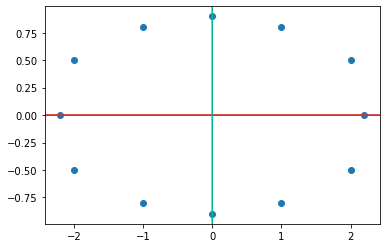

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

x = [-2.2, -2, -2, -1, -1, 0, 0, 1, 1, 2, 2, 2.2]
y = [0, .5, -.5, .8, -.8, .9, -.9, .8, -.8, .5, -.5, 0]

df = pd.DataFrame({"x": x, "y": y})

print('variance of X : ' + str(np.var(x)))
print('variance of Y : ' + str(np.var(y)))

plt.scatter(df['x'], df['y'])
plt.arrow(-3, 0, 6, 0, head_width = .05, head_length = .05, color ='#d63031')
plt.arrow(0, -1, 0, 6, head_width = .05, head_length = .05, color ='#00b894');

이번엔 조금 다른 예시 입니다. 만약 데이터가 아래처럼 X, Y 축에 평행하지 않다면 어떻게 해야할까요?

정답은 X, Y도 아닌 데이터의 흩어진 정도를 가장 크게 하는 벡터 축이 될 것입니다.

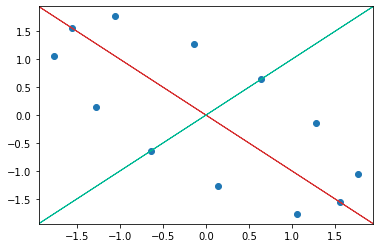

In [8]:
import math

df["x_rotate"] = df.apply(lambda x: (x.x+x.y)/math.sqrt(2), axis=1)
df["y_rotate"] = df.apply(lambda x: (x.y-x.x)/math.sqrt(2), axis=1)

plt.scatter(df['x_rotate'], df['y_rotate'])
plt.arrow(-2, 2, 6, -6, head_width = .05, head_length = .05, color ='#d63031')
plt.arrow(-2, -2, 6, 6, head_width = .05, head_length = .05, color ='#00b894');

## PCA Process

> 다차원의 데이터를 시각화 하기 위해서 2차원으로 (scatter) 축소하자
>
> 그런데 **제일 정보 손실이 적은** 2차원을 고르자 


<img src='https://user-images.githubusercontent.com/6457691/89995442-6be39880-dcc4-11ea-9422-fb62f8500a86.png'>




### 1) 데이터를 준비

$$X = $$ 

|$x_1$|$x_2$|$x_3$|
|:-:|:-:|:-:|
|0.2| 5.6| 3.56|
|0.45|5.89|2.4|
|0.33|6.37|1.95|
|0.54|7.9|1.32|
|0.77|7.87|0.98|

In [9]:
import numpy as np

X = np.array([ 
              [0.2, 5.6, 3.56], 
              [0.45, 5.89, 2.4],
              [0.33, 6.37, 1.95],
              [0.54, 7.9, 1.32],
              [0.77, 7.87, 0.98]
])
print("Data: ", X)

Data:  [[0.2  5.6  3.56]
 [0.45 5.89 2.4 ]
 [0.33 6.37 1.95]
 [0.54 7.9  1.32]
 [0.77 7.87 0.98]]


### 2) 각 열에 대해서 평균을 빼고, 표준편차로 나누어서 Normalize를 함.

In [10]:
standardized_data = ( X - np.mean(X, axis = 0) ) / np.std(X, ddof = 1, axis = 0)
print("\n Standardized Data: \n", standardized_data)


 Standardized Data: 
 [[-1.19298785 -1.0299848   1.5011907 ]
 [-0.03699187 -0.76471341  0.35403575]
 [-0.59186994 -0.32564351 -0.09098125]
 [ 0.37916668  1.07389179 -0.71400506]
 [ 1.44268298  1.04644992 -1.05024014]]


### 3) Z의 분산-공분산 매트릭스를 계산함

$Z^{T}Z$를 통해 계산 할 수 있습니다.

In [11]:
covariance_matrix = np.cov(standardized_data.T)
print("\n Covariance Matrix: \n", covariance_matrix)


 Covariance Matrix: 
 [[ 1.          0.84166641 -0.88401004]
 [ 0.84166641  1.         -0.91327498]
 [-0.88401004 -0.91327498  1.        ]]


### 4) 분산-공분산 매트릭스의 고유벡터와 고유값을 계산함


In [12]:
values, vectors = np.linalg.eig(covariance_matrix)
print("\n Eigenvalues: \n", values)
print("\n Eigenvectors: \n", vectors)


 Eigenvalues: 
 [2.75962684 0.1618075  0.07856566]

 Eigenvectors: 
 [[ 0.56991376  0.77982119  0.25899269]
 [ 0.57650106 -0.60406359  0.55023059]
 [-0.58552953  0.16427443  0.7938319 ]]


### 5) 데이터를 고유 벡터에 projection 시킴. (matmul)



In [13]:
Z = np.matmul(standardized_data, vectors)

print("\n Projected Data: \n", Z)


 Projected Data: 
 [[-2.15267901 -0.06153364  0.31598878]
 [-0.66923865  0.4912475  -0.14930446]
 [-0.47177644 -0.27978923 -0.40469283]
 [ 1.25326312 -0.47030949  0.12228952]
 [ 2.04043099  0.32038486  0.11571899]]


## 차원 축소라면서 왜 똑같이 3차원이죠?

PCA는 고차원의 데이터를 분산을 유지하는 축 (`PC`)을 기반으로 데이터를 변환 한것이며

해당 PC 들중 일부를 사용하는 것으로 차원 축소를 할 수 있습니다.

즉

$$X = $$ 

|$x_1$|$x_2$|$x_3$|
|:-:|:-:|:-:|
|0.2| 5.6| 3.56|
|0.45|5.89|2.4|
|0.33|6.37|1.95|
|0.54|7.9|1.32|
|0.77|7.87|0.98|

라는 데이터가

$$Z = $$ 

|$pc_1$|$pc_2$|$pc_3$|
|:-:|:-:|:-:|
|-2.1527|-0.0615|0.3160|
|-0.6692|0.4912|-0.1493|
|-0.4718|-0.2798|-0.4047|
|1.2533|-0.4703|0.1223|
|2.0404|0.3204|0.1157|

라는 데이터로 변환이 되었고

이 중

|$pc_1$|$pc_2$|
|:-:|:-:|
|-2.1527|-0.0615|
|-0.6692|0.4912|
|-0.4718|-0.2798|
|1.2533|-0.4703|
|2.0404|0.3204|

를 사용 할 경우 2차원으로 축소 했다 라는 의미가 있는거죠.

## 시각화

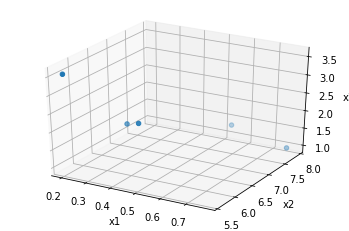

In [14]:
df = pd.DataFrame({"x1": [0.2, 0.45, 0.33, 0.54, 0.77] , "x2": [5.6, 5.89, 6.37, 7.9, 7.87], 'x3': [3.56, 2.4, 1.95, 1.32, 0.98]})

threedee = plt.figure().gca(projection = '3d')
threedee.scatter(df['x1'], df['x2'], df['x3'])
threedee.set_xlabel('x1')
threedee.set_ylabel('x2')
threedee.set_zlabel('x3')
plt.show()

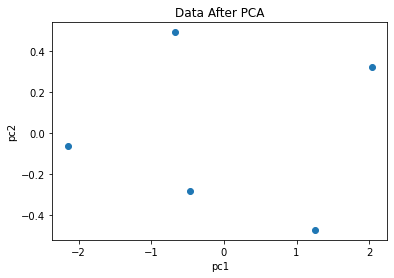

In [15]:
df = pd.DataFrame({"pc1": [-2.1527, -0.6692, -0.4718, 1.2533, 2.0404], "pc2": [-0.0616, 0.4912, -0.2798, -0.4703, 0.3204]})
plt.scatter(df['pc1'], df['pc2'])
plt.title("Data After PCA")
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

# 📕 라이브러리를 사용한 PCA

In [16]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA

print("Data: \n", X)

scaler = StandardScaler()
Z = scaler.fit_transform(X)
print("\n Standardized Data: \n", Z)

pca = PCA(2)

pca.fit(X)

print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

B = pca.transform(X)
print("\n Projected Data: \n", B)

Data: 
 [[0.2  5.6  3.56]
 [0.45 5.89 2.4 ]
 [0.33 6.37 1.95]
 [0.54 7.9  1.32]
 [0.77 7.87 0.98]]

 Standardized Data: 
 [[-1.33380097 -1.15155802  1.67838223]
 [-0.04135817 -0.85497558  0.395824  ]
 [-0.66173071 -0.36408051 -0.10172014]
 [ 0.42392124  1.20064752 -0.79828193]
 [ 1.61296861  1.16996658 -1.17420417]]

 Eigenvectors: 
 [[-0.13020816 -0.73000041  0.67092863]
 [-0.08905388  0.68256517  0.72537866]]

 Eigenvalues: 
 [2.15851707 0.09625196]

 Projected Data: 
 [[ 1.87404384  0.35553233]
 [ 0.85151446 -0.31022649]
 [ 0.21482136 -0.29832914]
 [-1.35210803  0.27030569]
 [-1.58827163 -0.0172824 ]]


## 중간에 standardized data가 이전과 다른 이유:

```python
standardized_data = ( X - np.mean(X, axis = 0) ) / np.std(X, ddof = 1, axis = 0)
print("\n Standardized Data: \n", standardized_data)
```

에서 `standard deviation`에 쓰이는 자유도가 **1이냐** 혹은 **0이냐**의 차이 (critical 한 차이 아님)

## PCA의 특징

- 데이터에 대해 **독립적인** 축을 찾는데 사용 할 수 있음.

- 데이터의 분포가 정규성을 띄지 않는 경우 적용이 어려움
  - 이 경우는 커널 PCA 를 사용 가능

- 분류 / 예측 문제에 대해서 데이터의 라벨을 고려하지 않기 때문에 효과적 분리가 어려움 
  - 이 경우는 PLS 사용 가능